In [247]:
import pandas as pd
import matplotlib.pyplot as plt

In [248]:
df = pd.read_csv('data')
df


,Year,Afghanistan,Albania,Algeria,Argentina,Argentina,Armenia,Australasia,Australia,Australia,...,Uzbekistan,Venezuela,Venezuela,Vietnam,Virgin Islands,West Germany,Yugoslavia,Yugoslavia,Zambia,Zimbabwe
0,1896,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1900,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2,1904,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,1908,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1912,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1920,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
6,1924,0,0,0,6,0,0,0,6,0,...,0,0,0,0,0,0,2,0,0,0
7,1928,0,0,0,7,0,0,0,4,0,...,0,0,0,0,0,0,5,0,0,0
8,1932,0,0,0,0,4,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
9,1936,0,0,0,7,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


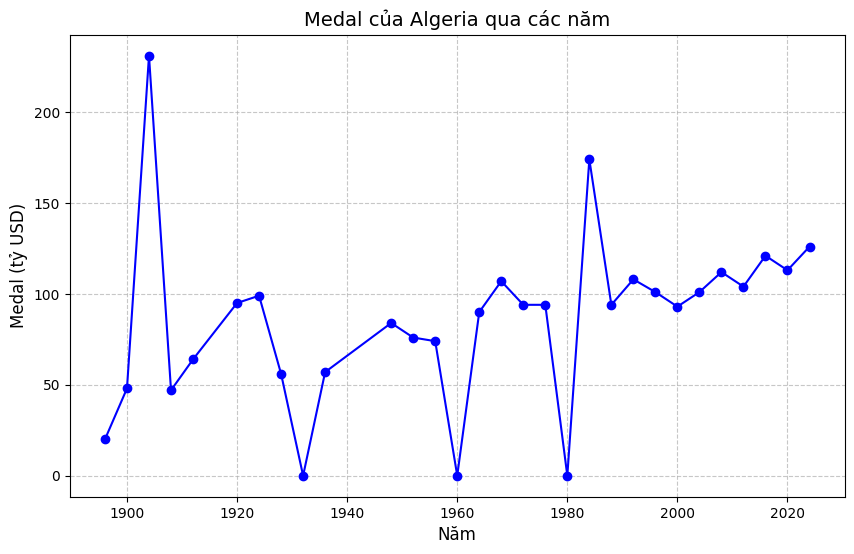

In [249]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['United States'], marker='o', linestyle='-', color='blue')

# Thêm tiêu đề và nhãn
plt.title(f"Medal của Algeria qua các năm", fontsize=14)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Medal (tỷ USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [250]:
pre_usa = df['United States'].shift(1)
growth = df['United States'] - pre_usa
growth = pd.DataFrame(growth)
growth = growth.dropna()
growth


,United States
1,28.0
2,183.0
3,-184.0
4,17.0
5,31.0
6,4.0
7,-43.0
8,-56.0
9,57.0
10,27.0


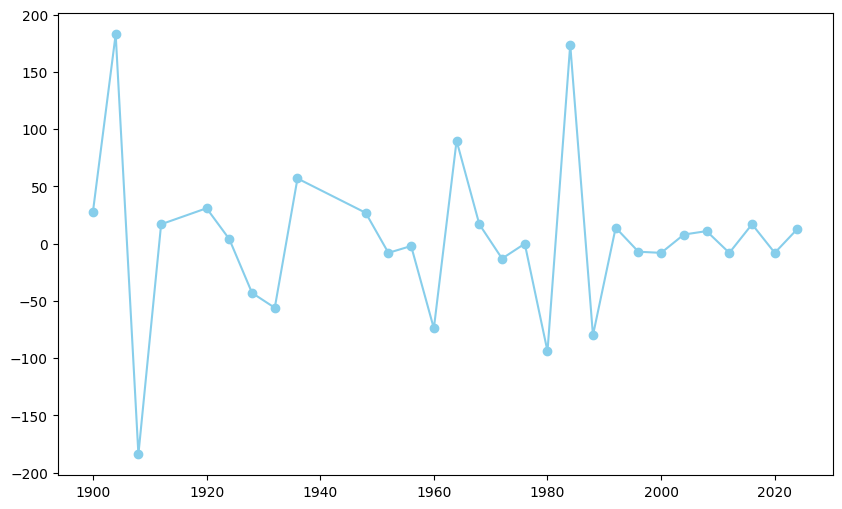

In [251]:
plt.figure(figsize =(10,6))
plt.plot(df['Year'].iloc[1:], growth, marker='o', linestyle='-', color='skyblue')

In [252]:
athletes_df = pd.read_csv("2025_Problem_C_Data\\summerOly_athletes.csv")
medal_counts_df = pd.read_csv("2025_Problem_C_Data\\summerOly_medal_counts.csv")

In [253]:
medal_to_points = {
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1,
    'No medal': 0
}
athletes_df['Points'] = athletes_df['Medal'].map(medal_to_points)
grouped_df = athletes_df.groupby(['NOC','Year', 'Sport'])['Points'].sum().reset_index()
grouped_df

,NOC,Year,Sport,Points
0,AFG,1936,Athletics,0
1,AFG,1936,Hockey,0
2,AFG,1948,Football,0
3,AFG,1948,Hockey,0
4,AFG,1956,Hockey,0
...,...,...,...,...
26224,ZIM,2020,Rowing,0
26225,ZIM,2020,Swimming,0
26226,ZIM,2024,Athletics,0
26227,ZIM,2024,Rowing,0


In [262]:
df2 = grouped_df.query('NOC == "FRA" and Year == 2024')
df1 = grouped_df.query('NOC == "JPN" and Year == 2020')

In [263]:
# Tính tổng điểm theo năm
total_points = df1.groupby('Year')['Points'].sum().reset_index()
total_points.rename(columns={'Points': 'Total Points'}, inplace=True)
sports_to_exclude = ['Karate', 'Baseball', 'Skateboarding', 'Surfing', 'Sport Climbing', 'Softball']
# Tính tổng điểm trừ Breaking
total_points_excluding_ = df1[~grouped_df['Sport'].isin(sports_to_exclude)].groupby('Year')['Points'].sum().reset_index()
total_points_excluding_.rename(columns={'Points': 'Total Points Excluding'}, inplace=True)

# Kết hợp hai bảng
result1 = pd.merge(total_points, total_points_excluding_, on='Year')
print(result1)

   Year  Total Points  Total Points Excluding
0  2020           308                     284


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24908\418969848.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_points_excluding_ = df1[~grouped_df['Sport'].isin(sports_to_exclude)].groupby('Year')['Points'].sum().reset_index()


In [264]:
# Tính tổng điểm theo năm
total_points = df2.groupby('Year')['Points'].sum().reset_index()
total_points.rename(columns={'Points': 'Total Points'}, inplace=True)

# Tính tổng điểm trừ Breaking
total_points_excluding_breaking = df2[grouped_df['Sport'] != 'Breaking'].groupby('Year')['Points'].sum().reset_index()
total_points_excluding_breaking.rename(columns={'Points': 'Total Points Excluding Breaking'}, inplace=True)

# Kết hợp hai bảng
result2 = pd.merge(total_points, total_points_excluding_breaking, on='Year')
print(result2)

   Year  Total Points  Total Points Excluding Breaking
0  2024           388                              386


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24908\2330979416.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_points_excluding_breaking = df2[grouped_df['Sport'] != 'Breaking'].groupby('Year')['Points'].sum().reset_index()


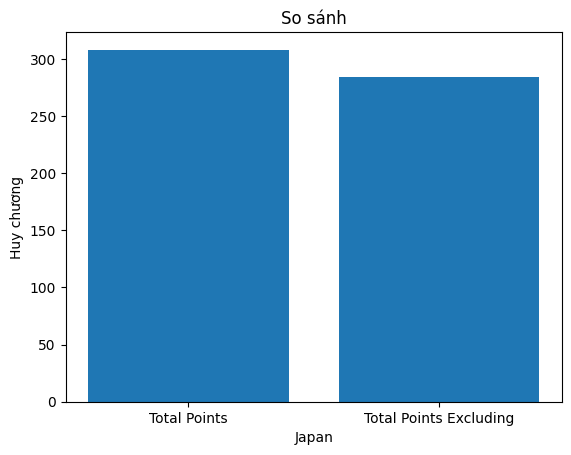

In [265]:
import matplotlib.pyplot as plt
import numpy as np

categories = result1.columns[1:]
values1 = result1.iloc[0, 1:].values

# Vẽ biểu đồ cột
plt.bar(categories, values1)

# Thêm tiêu đề và nhãn
plt.title('So sánh')
plt.xlabel('Japan')
plt.ylabel('Huy chương')

# Hiển thị biểu đồ
plt.show()


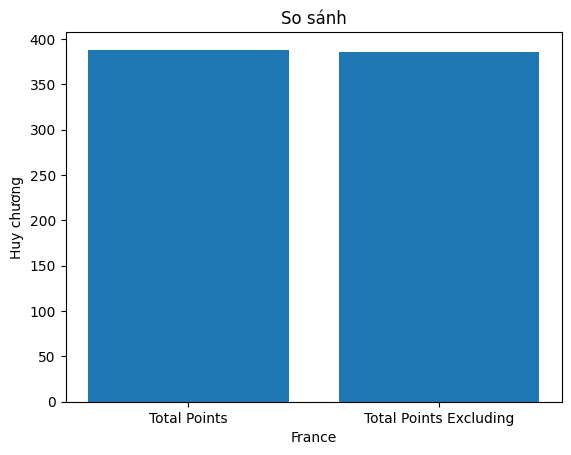

In [266]:

value2 = result2.iloc[0, 1:].values

# Vẽ biểu đồ cột
plt.bar(categories, value2)


# Thêm tiêu đề và nhãn
plt.title('So sánh')
plt.xlabel('France')
plt.ylabel('Huy chương')

# Hiển thị biểu đồ
plt.show()